# Import Libraries :

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as py
import warnings
warnings.filterwarnings("ignore")

# Import Dataset :

In [2]:
data = pd.read_csv(r"\Customer Churn.csv")

# Dataset Description :



The dataset contains **7043 records** and **21 columns** related to customer information for a telecom company, aimed at analyzing customer churn. Below is a detailed description of the columns:

1. **customerID**: Unique identifier for each customer (non-null object).
2. **gender**: Customer gender (Male/Female).
3. **SeniorCitizen**: Indicates if the customer is a senior citizen (0 = No, 1 = Yes).
4. **Partner**: Whether the customer has a partner (Yes/No).
5. **Dependents**: Whether the customer has dependents (Yes/No).
6. **tenure**: Number of months the customer has stayed with the company.
7. **PhoneService**: Whether the customer has phone service (Yes/No).
8. **MultipleLines**: Whether the customer has multiple lines (Yes/No/No phone service).
9. **InternetService**: Type of internet service the customer has (DSL, Fiber optic, or No).
10. **OnlineSecurity**: Whether the customer has online security service (Yes/No/No internet service).
11. **OnlineBackup**: Whether the customer has online backup (Yes/No/No internet service).
12. **DeviceProtection**: Whether the customer has device protection (Yes/No/No internet service).
13. **TechSupport**: Whether the customer has tech support (Yes/No/No internet service).
14. **StreamingTV**: Whether the customer has streaming TV service (Yes/No/No internet service).
15. **StreamingMovies**: Whether the customer has streaming movies service (Yes/No/No internet service).
16. **Contract**: The contract type (Month-to-month, One year, Two year).
17. **PaperlessBilling**: Whether the customer is on paperless billing (Yes/No).
18. **PaymentMethod**: The payment method used by the customer (Electronic check, Mailed check, Bank transfer, Credit card).
19. **MonthlyCharges**: The amount charged to the customer per month (float).
20. **TotalCharges**: Total amount charged (stored as an object but should be numerical).
21. **Churn**: Whether the customer churned (Yes/No).

### Data Types:
- Most columns are categorical (object), except for **tenure**, **SeniorCitizen** (both int64), and **MonthlyCharges** (float64).
- **TotalCharges** is stored as a string/object but should be converted to numerical for analysis.

### Observations:
- The dataset includes a wide variety of customer services, including internet, phone, and support-related services, along with customer demographics (senior citizen, partner, dependents).
- The target variable for churn prediction is **Churn**.


# Explore data :

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [5]:
data.shape

(7043, 21)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
len(data.columns)

21

In [9]:
data.select_dtypes("O")

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,1889.5,No
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,108.15,Yes
3,7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),1840.75,No
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,1990.5,No
7039,2234-XADUH,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),7362.9,No
7040,4801-JZAZL,Female,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,346.45,No
7041,8361-LTMKD,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,306.6,Yes


In [10]:
data.select_dtypes("int")

,SeniorCitizen,tenure
0,0,1
1,0,34
2,0,2
3,0,45
4,0,2
...,...,...
7038,0,24
7039,0,72
7040,0,11
7041,1,4


In [11]:
data.select_dtypes("float")

,MonthlyCharges
0,29.85
1,56.95
2,53.85
3,42.30
4,70.70
...,...
7038,84.80
7039,103.20
7040,29.60
7041,74.40


In [12]:
data.count()

customerID          7043
gender              7043
SeniorCitizen       7043
Partner             7043
Dependents          7043
tenure              7043
PhoneService        7043
MultipleLines       7043
InternetService     7043
OnlineSecurity      7043
OnlineBackup        7043
DeviceProtection    7043
TechSupport         7043
StreamingTV         7043
StreamingMovies     7043
Contract            7043
PaperlessBilling    7043
PaymentMethod       7043
MonthlyCharges      7043
TotalCharges        7043
Churn               7043
dtype: int64

### There is no null values in dataset

In [13]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [14]:
data.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

### There are blank rows in TotalCharges column

In [15]:
data[data["TotalCharges"] == " "]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


### Replace blank rows into 0 and convert it into float data type to perform calculations

In [16]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [17]:
# replace blank values
data["TotalCharges"] = data["TotalCharges"].replace(" ","0")

# Convert data type of that column into float
data["TotalCharges"] = data["TotalCharges"].astype("float")


# Run the data 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Check for dataset descriptive analysis :

In [18]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


### Check for duplicates values :

In [19]:
data[data.duplicated()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [20]:
data.duplicated().sum()

0

In [21]:
data["customerID"].duplicated().sum() # There is no duplicate values for customerID column

0

### Convert SeniorCitizen column values (0,1) into "yes" and "no" for mapping. Also, it is easy to understand.

In [22]:
data["SeniorCitizen"].unique()

array([0, 1], dtype=int64)

In [23]:
# Create function to map the values

def convert(value):
    if value == 1:
        return "yes"
    else:
        return "no"

# Apply function to that column   
data["SeniorCitizen"] = data["SeniorCitizen"].apply(convert)


# Check data
data.head(5)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Count of Churned and Non-Churned Customers :

In [24]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

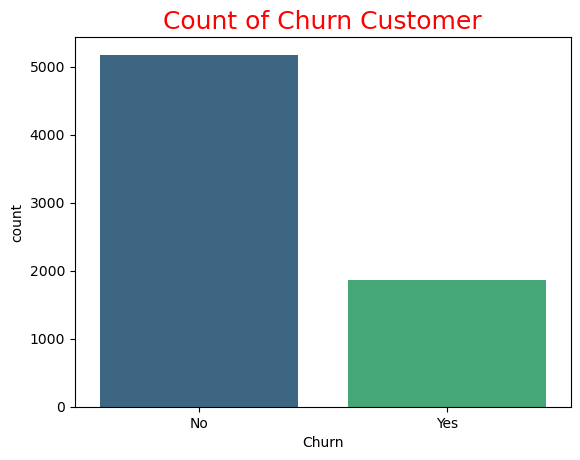

In [28]:
sns.countplot(data = data , x = "Churn", palette = "viridis")
py.title("Count of Churn Customer", fontsize = 18 , color = "red")
py.show()

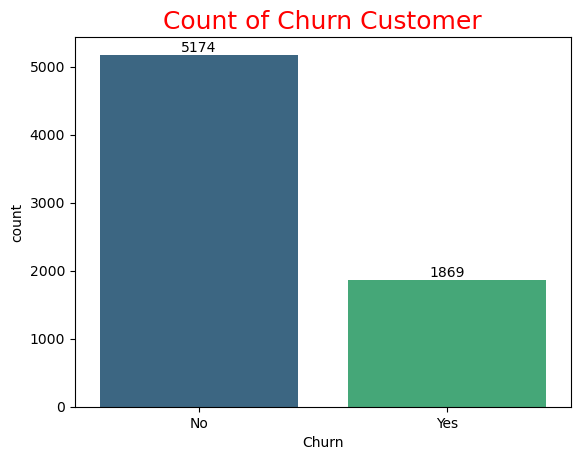

In [30]:
# Store the plot in ax 
ax = sns.countplot(data = data , x = "Churn", palette = "viridis")

# It will return count on bars 
ax.bar_label(ax.containers[0])


py.title("Count of Churn Customer", fontsize = 18 , color = "red")
py.show()

## Percentage of Churned and Non-Churned Customers :

In [47]:
data.groupby("Churn").agg({"Churn" : "count"})

,Churn
Churn,
No,5174
Yes,1869


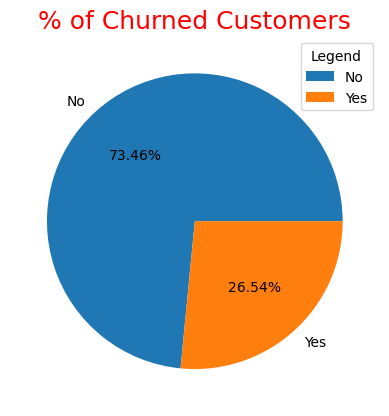

In [55]:
df = data.groupby("Churn").agg({"Churn" : "count"})

py.pie(df["Churn"] ,  autopct = "%1.2f%%" , labels = df.index )
py.title("% of Churned Customers" , fontsize = 18 , color = "red" )
py.legend(title = "Legend")

py.show()

In [40]:
pd.DataFrame(data["Churn"].value_counts())

,Churn
No,5174
Yes,1869


> Note : From the given pie chart, we can conclude that 26.54% customers churned

## Count of Gender :

In [58]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

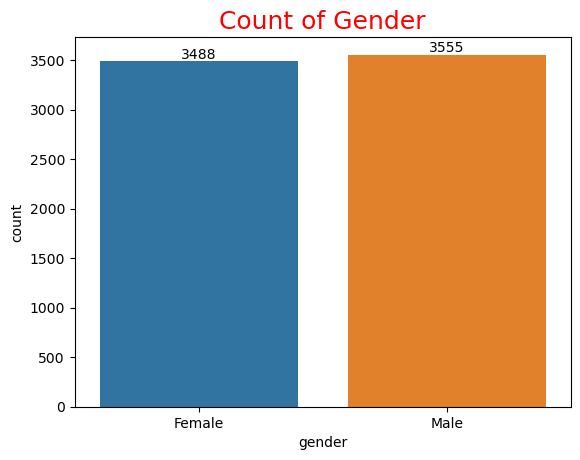

In [60]:
# Create countplot of gender
ax1 = sns.countplot(data = data , x = "gender")

# It will return count on bars
ax1.bar_label(ax1.containers[0])

py.title("Count of Gender", fontsize = 18, color = "red")
py.show() # To show the plot

## Gender-Wise Count of Churned Customers :

In [61]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

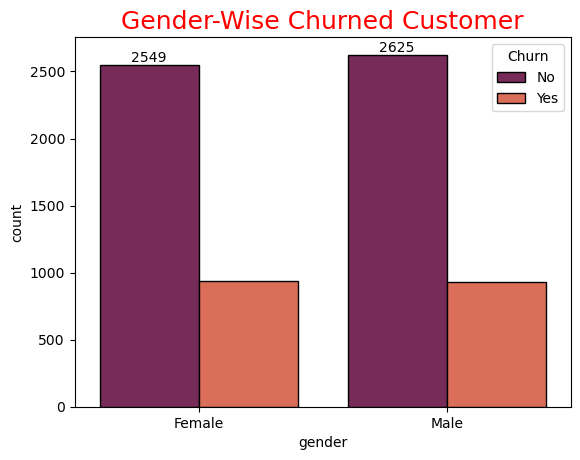

In [66]:
# Create countplot of gender-wise churn
ax2 = sns.countplot(data = data , x= "gender" , hue = "Churn", palette = "rocket", edgecolor = "black")

# It will return count on bars
ax2.bar_label(ax2.containers[0])

py.title("Gender-Wise Churned Customer", fontsize = 18 , color = "red")
py.show()

> Male churned customers are almost same as female.

## Count of Senior Citizen :

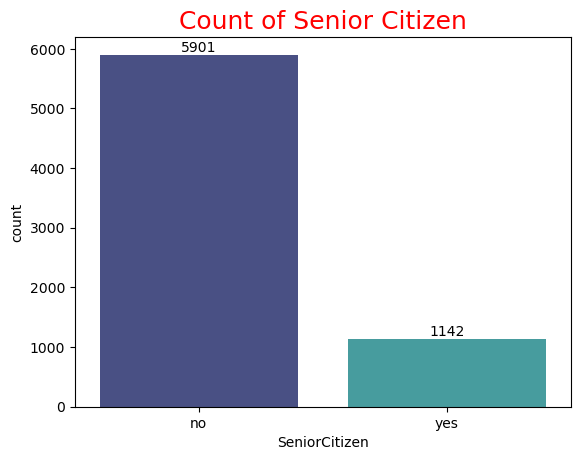

In [75]:
# Create countplot of Senior Citizen
ax3 = sns.countplot(data = data , x = "SeniorCitizen" , palette = "mako")

# It will return count on bars
ax3.bar_label(ax3.containers[0])

py.title("Count of Senior Citizen", fontsize = 18 , color = "red")

py.show()

## Count of Senior Citizen Churned and Non- Chuned Customers :

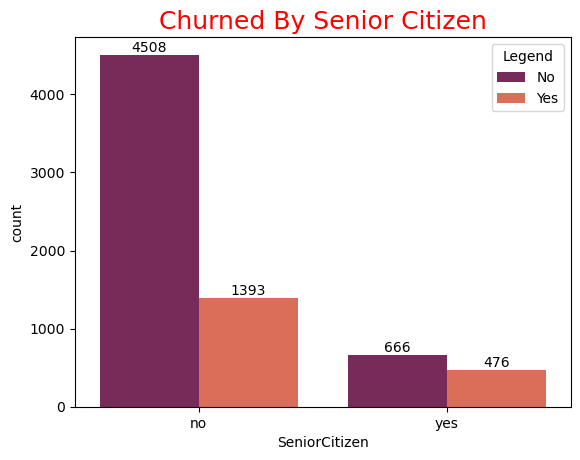

In [129]:
ax4 = sns.countplot(data = data , x = "SeniorCitizen" , hue = "Churn" , palette = "rocket")

ax4.bar_label(ax4.containers[0])
ax4.bar_label(ax4.containers[1])

py.title("Churned By Senior Citizen" , fontsize = 18 , color = "red")
py.legend(title = "Legend")

py.show()

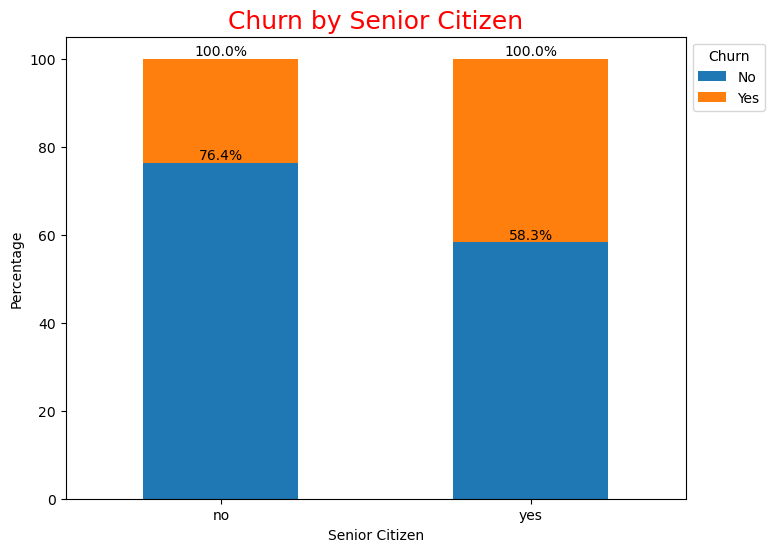

In [85]:
# Step 1: Create a crosstab to compute percentages
counts = pd.crosstab(data['SeniorCitizen'], data['Churn'], normalize='index') * 100

# Step 2: Plot stacked bar chart
ax4 = counts.plot(kind='bar', stacked=True,  figsize=(8, 6))

# Step 3: Add labels to show percentages
for container in ax4.containers:
    ax4.bar_label(container, fmt='%.1f%%')

# Step 4: Customize the chart
py.title("Churn by Senior Citizen", fontsize=18, color="red")
py.xlabel("Senior Citizen")
py.ylabel("Percentage")
py.legend(title="Churn", bbox_to_anchor = (1 , 1))
py.xticks(rotation = 0)
py.show()

> Greater % of people in Senior Citizen have churned out which is around 58.3 

## Churn by Tenure :

In [89]:
data.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


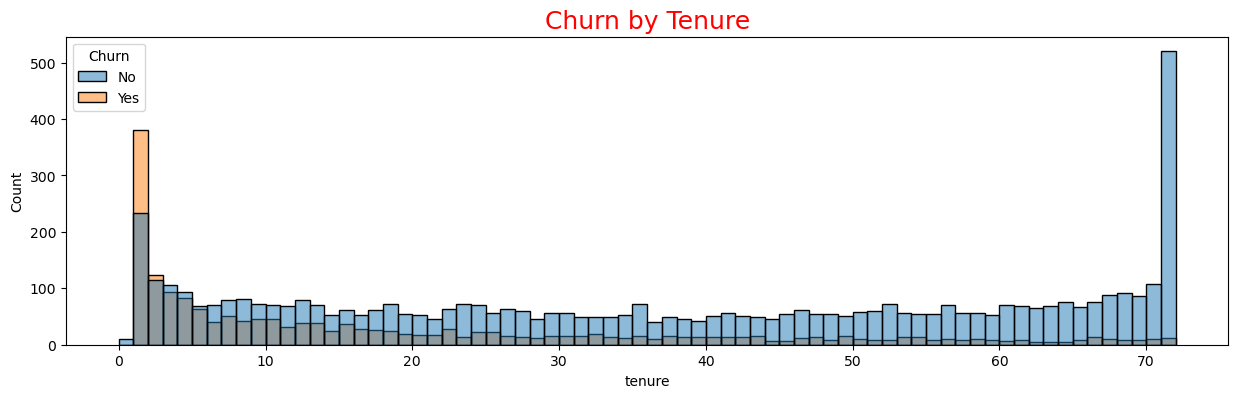

In [99]:
py.figure(figsize = (15,4))
sns.histplot(data = data , x = "tenure" , bins = 72 , hue = "Churn")
py.title("Churn by Tenure" , fontsize = 18 , color = "red")
py.show()

> People who have uses services for long time stayed and people who have used services for 1 or 2 months churn out

## Churn by Type of Contract :

In [101]:
data.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


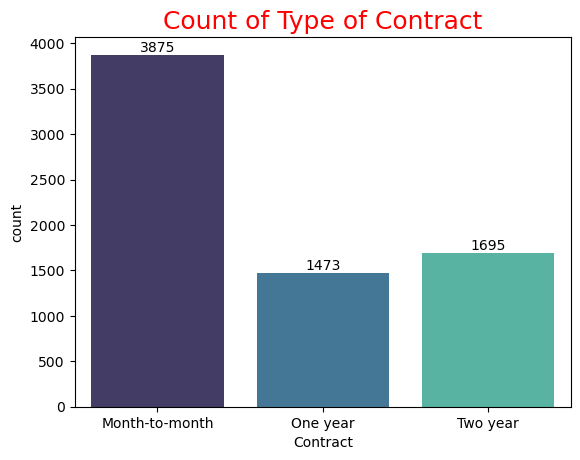

In [104]:
# Create countplot of Contract
ax5 = sns.countplot(data = data , x = "Contract" , palette = "mako")

# It will return count on bars
ax5.bar_label(ax5.containers[0])

py.title("Count of Type of Contract", fontsize = 18 , color = "red")

py.show()

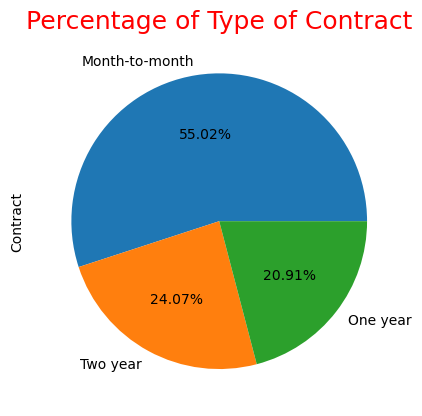

In [110]:
data["Contract"].value_counts().plot(kind = "pie" , autopct = "%1.2f%%")
py.title("Percentage of Type of Contract" , fontsize = 18 , color = "red")
py.show()

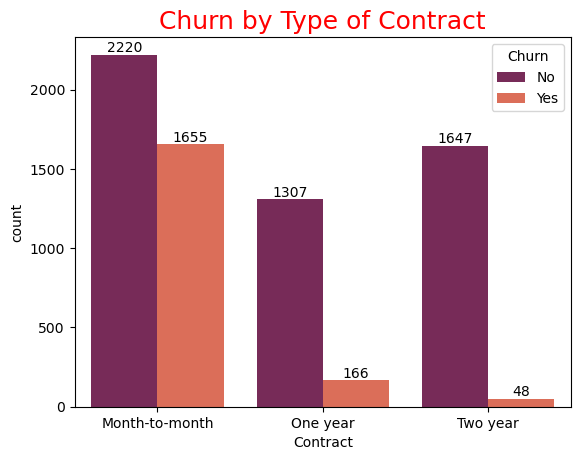

In [128]:
# Create countplot of Contract
ax6 = sns.countplot(data = data , x = "Contract" , hue = "Churn" , palette = "rocket")

# It will return count on bars
ax6.bar_label(ax6.containers[0])
ax6.bar_label(ax6.containers[1])

py.title("Churn by Type of Contract", fontsize = 18 , color = "red")

py.show()

> From above bar chart we conclude that, churn is high for month-to-month contract
> One year and Two year contract has less churn

## Churn by Services :

In [116]:
data.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [112]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

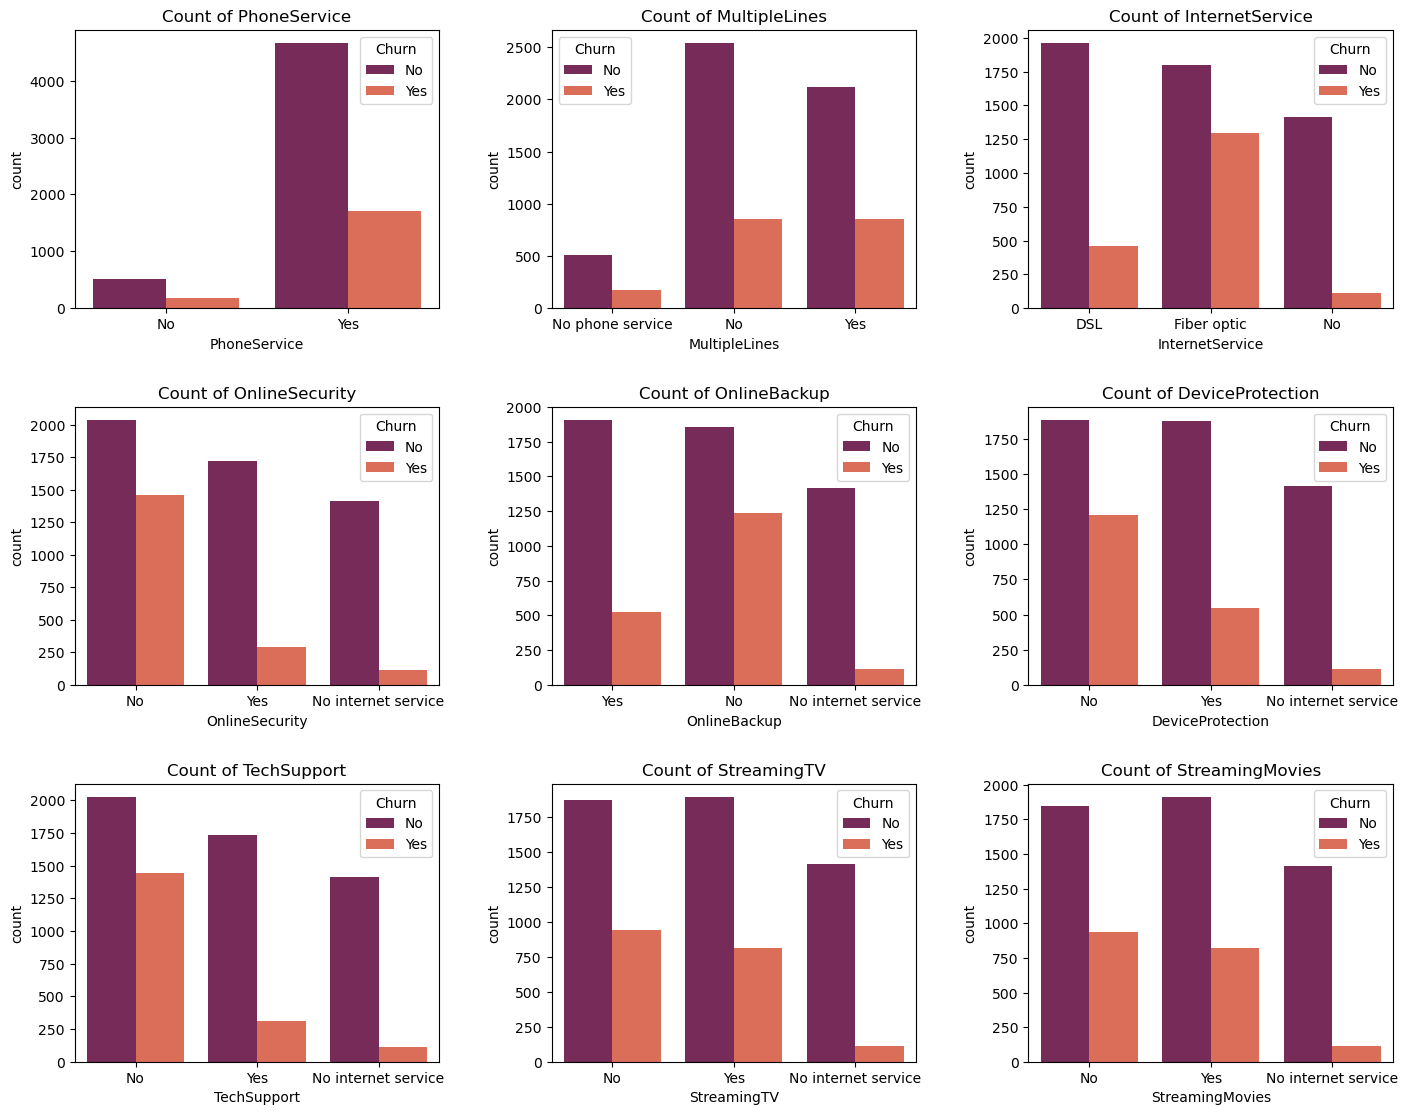

In [115]:
# List of columns you want to plot
columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
           'OnlineBackup', 'DeviceProtection', 'TechSupport', 
           'StreamingTV', 'StreamingMovies']

# Step 1: Set up the figure and axes
fig, axes = py.subplots(nrows=3, ncols=3, figsize=(15, 12))  # Create a 3x3 grid of subplots
fig.tight_layout(pad=5.0)  # Add some space between the plots

# Step 2: Iterate through columns and create a countplot for each
for col, ax in zip(columns, axes.flatten()):  # Flatten the axes array for easy iteration
    sns.countplot(data=data, x=col, palette="rocket", ax=ax, hue = data["Churn"])
    ax.set_title(f'Count of {col}', fontsize=12)

# Step 3: Display the plots
py.show()

 > Churn rates are notably higher for customers using fiber optic internet and for those lacking online security, backup, or tech support services. This suggests that customers without certain protective services or with fiber optic internet are more prone to churn.

## Churn by Payment Method :

In [117]:
data.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [118]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

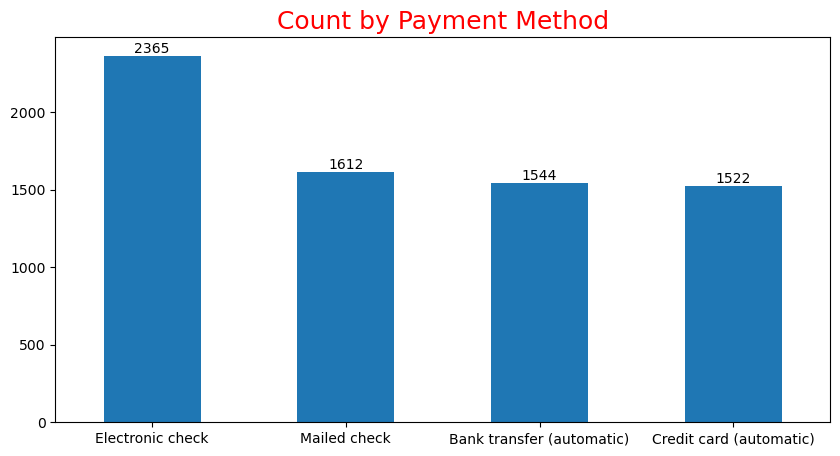

In [123]:
py.figure(figsize = (10,5))

ax7 = data["PaymentMethod"].value_counts().plot(kind="bar")
ax7.bar_label(ax7.containers[0])
py.title("Count by Payment Method" , fontsize = 18 , color = "red")
py.xticks(rotation = 0)

py.show()

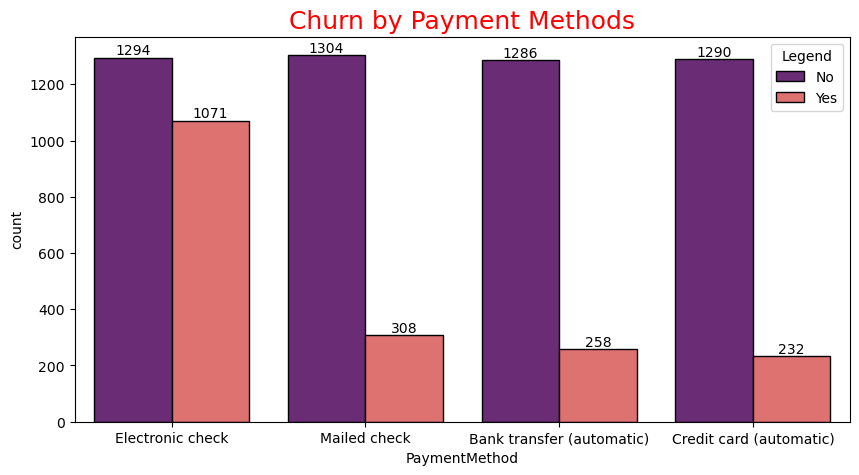

In [136]:
py.figure(figsize = (10,5))

ax8 = sns.countplot(data = data , x = "PaymentMethod" , hue = "Churn", palette = "magma" , edgecolor = "black")
ax8.bar_label(ax8.containers[0])
ax8.bar_label(ax8.containers[1])

py.legend(title="Legend" , bbox_to_anchor = (1,1))
py.title("Churn by Payment Methods" , fontsize = 18 , color = "red")

py.show()

> Customer is likely to churn when, he is using Electronic Check method